<a href="https://colab.research.google.com/github/victoriaD2000/Cardiovascular-Disease-Dataset-Group-42-/blob/main/Cardiovascular_Disease_Dataset_(Group_42).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Step 1: Import Libraries**

In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# **Step 2: Read Dataset**

In [60]:
df=pd.read_csv("/content/Heart_data..csv")

In [61]:
#head
df.head()

,Age,Sex,Chp,Bp,Sch,Fbs,Ecg,Mhrt,Exian,Opk,Slope,Vessel,Thal,Class
0,63.0,1.0,1.0,145,233.0,1.0,2.0,150,0.0,2.3,3.0,0,6.0,0
1,67.0,1.0,4.0,160,286.0,0.0,2.0,108,1.0,NaN,2.0,3,3.0,2
2,67.0,1.0,4.0,120,229.0,0.0,2.0,129,1.0,2.6,2.0,2,7.0,1
3,37.0,1.0,3.0,130,250.0,0.0,NaN,187,0.0,3.5,3.0,0,3.0,0
4,41.0,0.0,2.0,130,204.0,0.0,2.0,172,0.0,1.4,1.0,0,3.0,0


In [62]:
df = df.drop(df.loc[df['Class'] == 2].index)
df["Class"].fillna(df["Class"].mean(), inplace=True)


In [63]:
#To confirm
df.head()

,Age,Sex,Chp,Bp,Sch,Fbs,Ecg,Mhrt,Exian,Opk,Slope,Vessel,Thal,Class
0,63.0,1.0,1.0,145,233.0,1.0,2.0,150,0.0,2.3,3.0,0,6.0,0
2,67.0,1.0,4.0,120,229.0,0.0,2.0,129,1.0,2.6,2.0,2,7.0,1
3,37.0,1.0,3.0,130,250.0,0.0,NaN,187,0.0,3.5,3.0,0,3.0,0
4,41.0,0.0,2.0,130,204.0,0.0,2.0,172,0.0,1.4,1.0,0,3.0,0
5,56.0,1.0,2.0,120,236.0,0.0,0.0,178,0.0,0.8,1.0,0,3.0,0


In [64]:
#tail
df.tail()

,Age,Sex,Chp,Bp,Sch,Fbs,Ecg,Mhrt,Exian,Opk,Slope,Vessel,Thal,Class
1585,49.0,1.0,2.0,130,266.0,0.0,0.0,171,0.0,0.6,1.0,0,3.0,1
1587,52.0,1.0,3.0,172,199.0,1.0,0.0,162,0.0,0.5,1.0,0,7.0,1
1588,44.0,1.0,2.0,120,263.0,0.0,0.0,173,0.0,0.0,1.0,0,7.0,1
1589,56.0,0.0,NaN,140,294.0,0.0,2.0,153,0.0,1.3,2.0,0,3.0,1
1590,57.0,1.0,4.0,140,192.0,0.0,0.0,148,0.0,0.4,2.0,0,6.0,1


# **Step 3: Sanity check of Data**

In [65]:
#shape
df.shape

(1437, 14)

In [66]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1437 entries, 0 to 1590
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     1368 non-null   float64
 1   Sex     1409 non-null   float64
 2   Chp     1298 non-null   float64
 3   Bp      1437 non-null   int64  
 4   Sch     1380 non-null   float64
 5   Fbs     1365 non-null   float64
 6   Ecg     1431 non-null   float64
 7   Mhrt    1437 non-null   int64  
 8   Exian   1392 non-null   float64
 9   Opk     1407 non-null   float64
 10  Slope   1389 non-null   float64
 11  Vessel  1437 non-null   int64  
 12  Thal    1430 non-null   float64
 13  Class   1437 non-null   int64  
dtypes: float64(10), int64(4)
memory usage: 168.4 KB


In [67]:
#finding missing values
df.isnull().sum()

Age        69
Sex        28
Chp       139
Bp          0
Sch        57
Fbs        72
Ecg         6
Mhrt        0
Exian      45
Opk        30
Slope      48
Vessel      0
Thal        7
Class       0
dtype: int64

In [68]:
#checking the percentage of the missing values
df.isnull().sum()/df.shape[0]*100

Age       4.801670
Sex       1.948504
Chp       9.672930
Bp        0.000000
Sch       3.966597
Fbs       5.010438
Ecg       0.417537
Mhrt      0.000000
Exian     3.131524
Opk       2.087683
Slope     3.340292
Vessel    0.000000
Thal      0.487126
Class     0.000000
dtype: float64

In [69]:
#finding duplicates
df.duplicated().sum()

446

In [70]:
#Drop duplicates
df.drop_duplicates(inplace=True)


In [71]:
df.duplicated().sum()

0

# **Step 4: Explorative Data Analysis (EDA)**

In [72]:
#descriptive statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,923.0,54.007584,9.141153,29.0,47.0,54.0,60.0,77.0
Sex,964.0,0.660788,0.473688,0.0,0.0,1.0,1.0,1.0
Chp,857.0,1.841307,1.420156,0.0,0.0,2.0,3.0,4.0
Bp,991.0,131.172553,17.641248,94.0,120.0,130.0,140.0,200.0
Sch,937.0,245.337247,51.318236,126.0,211.0,240.0,271.0,564.0
Fbs,920.0,0.141304,0.348525,0.0,0.0,0.0,0.0,1.0
Ecg,985.0,0.710660,0.785112,0.0,0.0,1.0,1.0,2.0
Mhrt,991.0,151.494450,22.394708,71.0,138.0,155.0,168.5,202.0
Exian,947.0,0.287223,0.452706,0.0,0.0,0.0,1.0,1.0
Opk,962.0,0.982536,1.136137,0.0,0.0,0.6,1.6,6.2


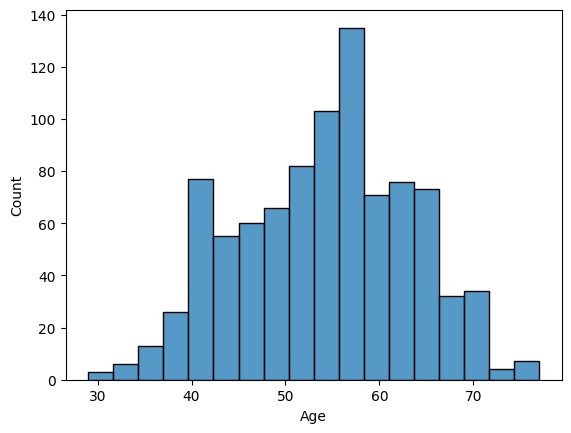

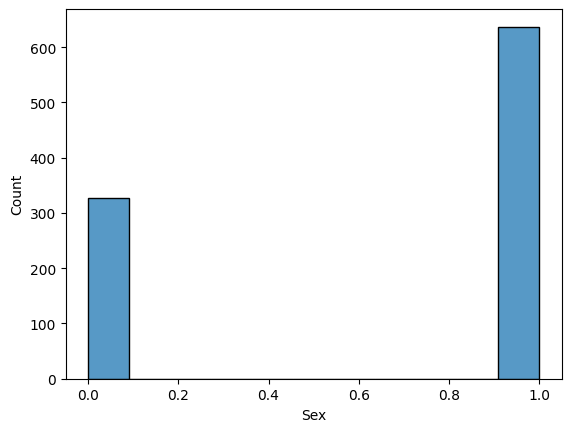

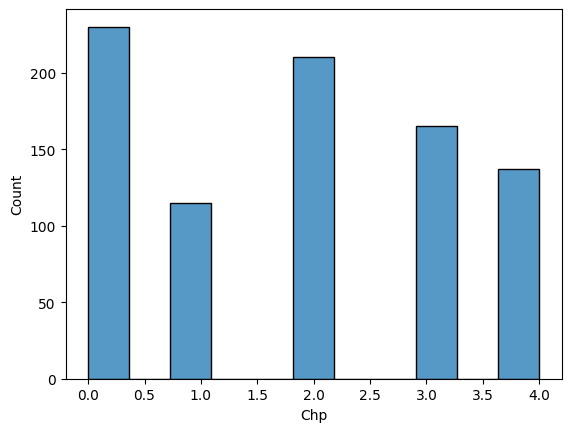

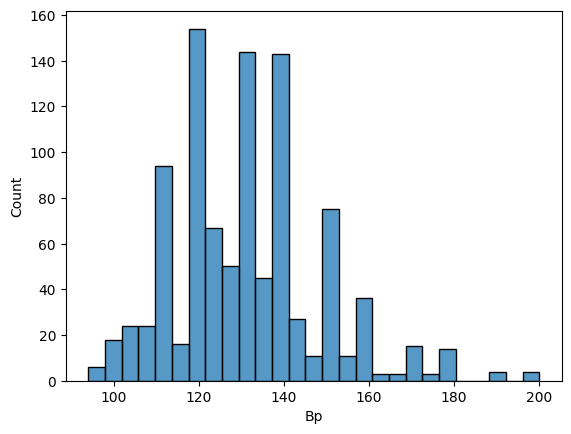

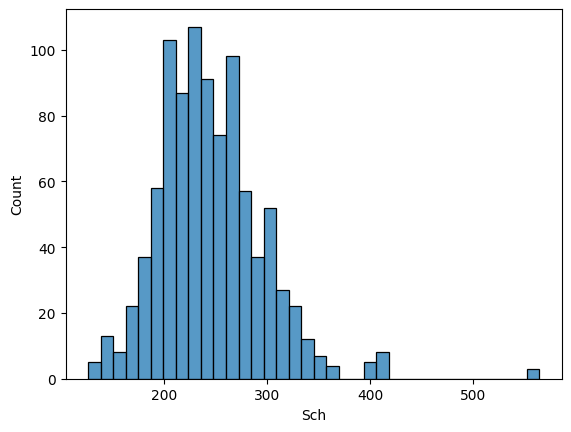

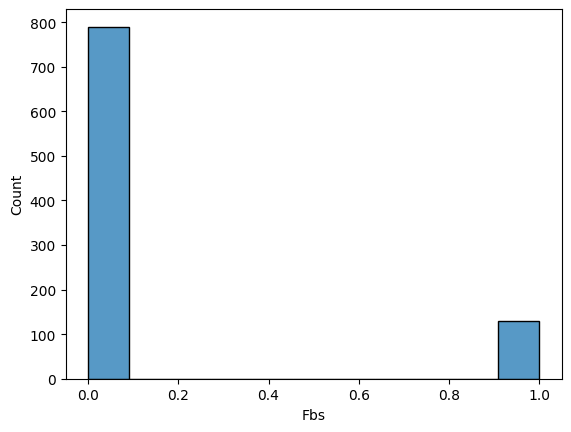

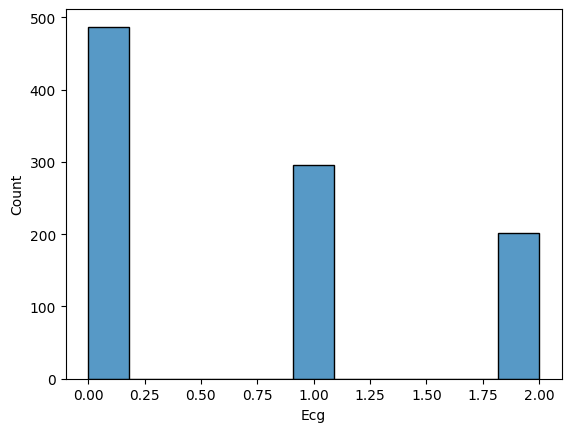

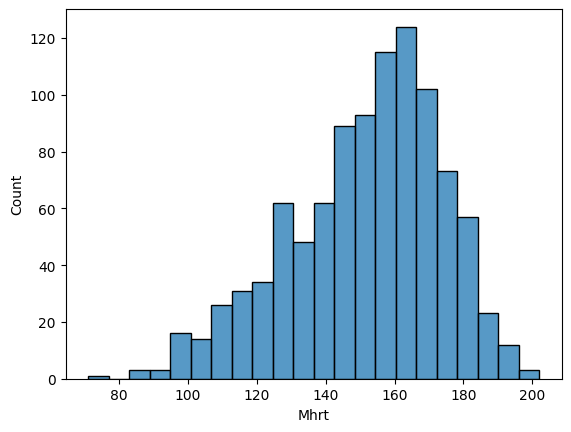

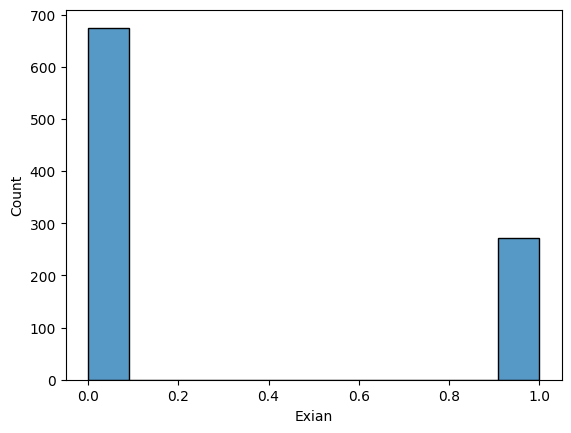

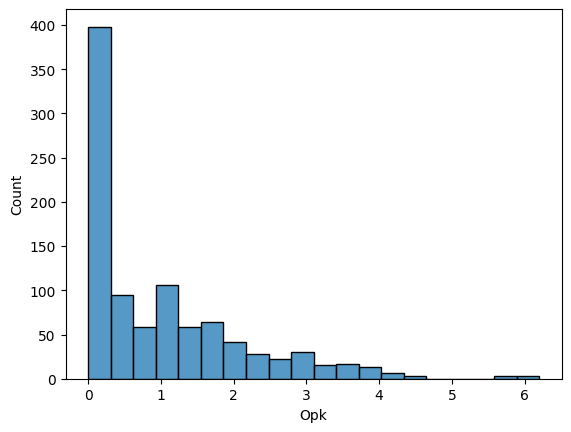

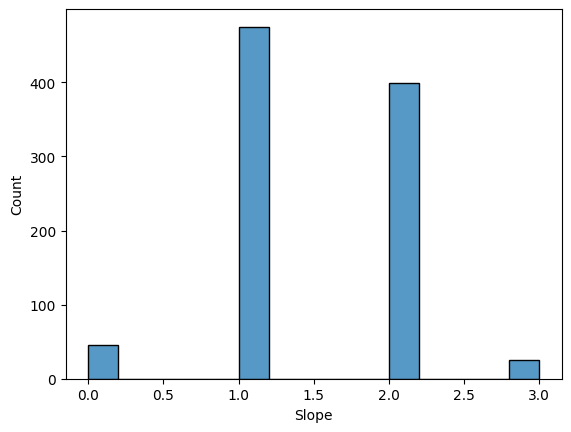

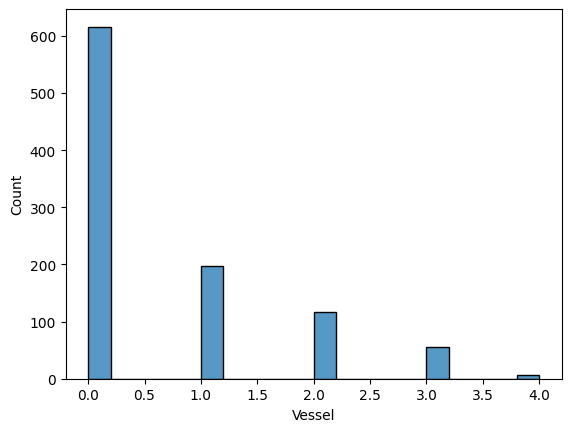

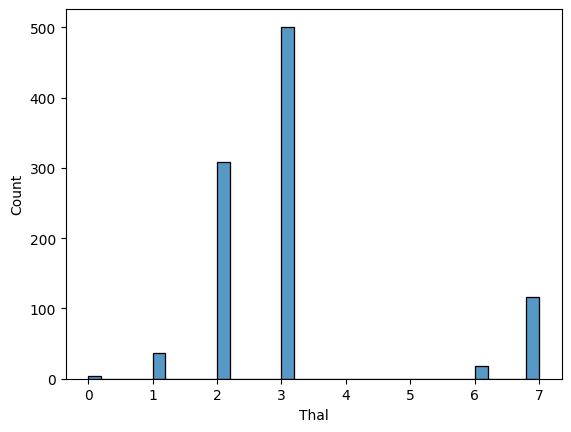

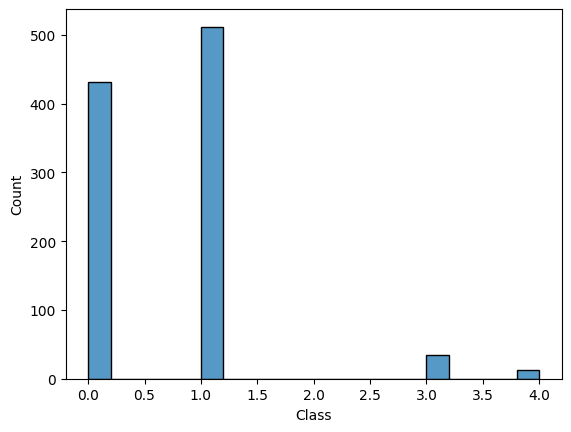

In [73]:
#histogram to understand the distribution
import warnings
warnings.filterwarnings("ignore")
for i in df.select_dtypes(include="number").columns:
     sns.histplot(data=df,x=i)
     plt.show()

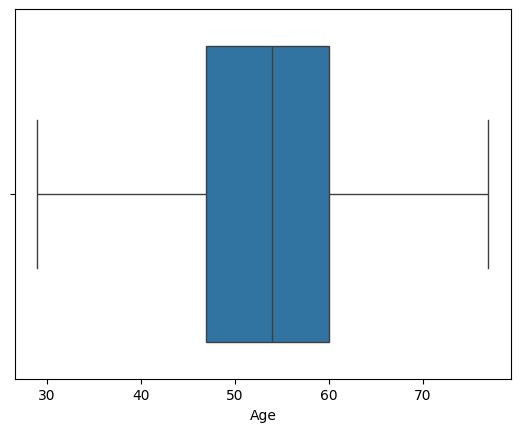

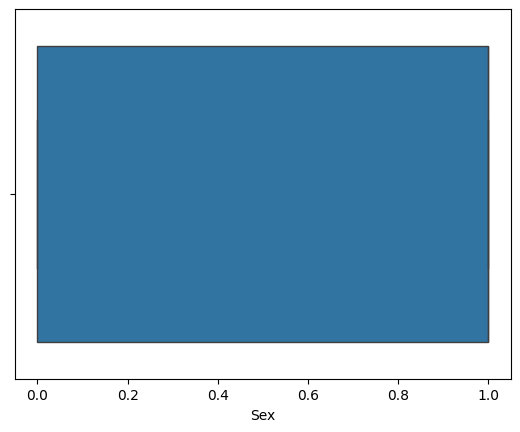

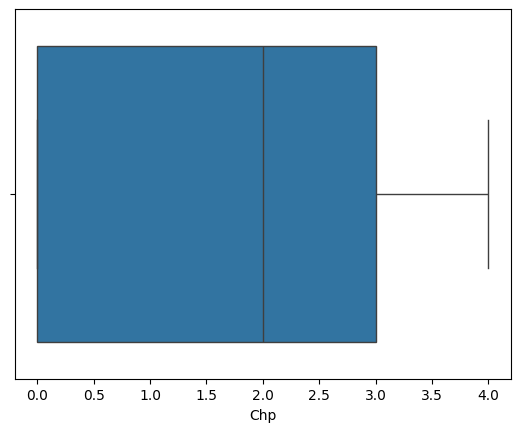

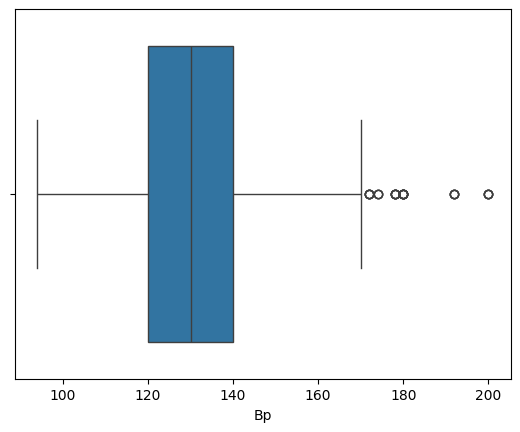

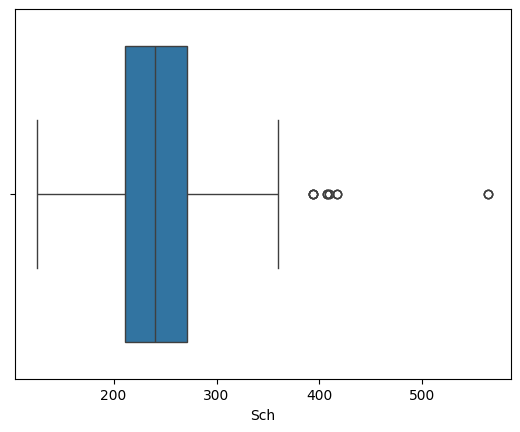

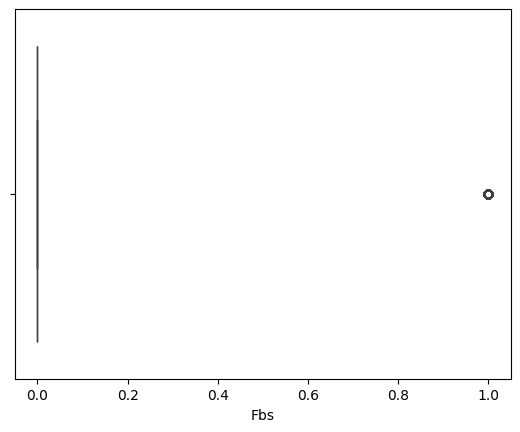

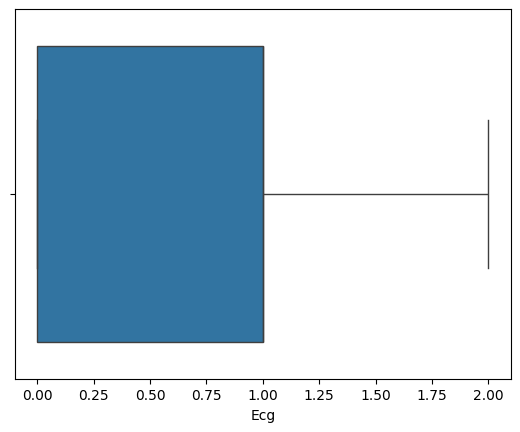

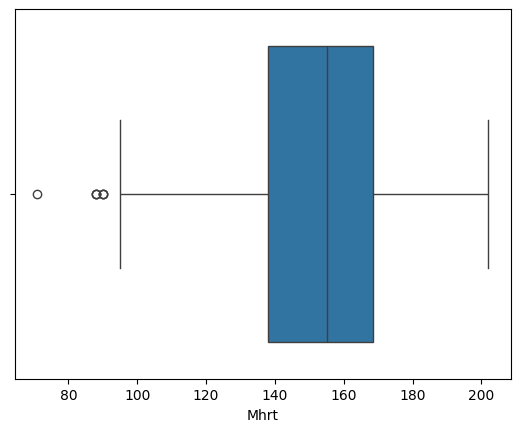

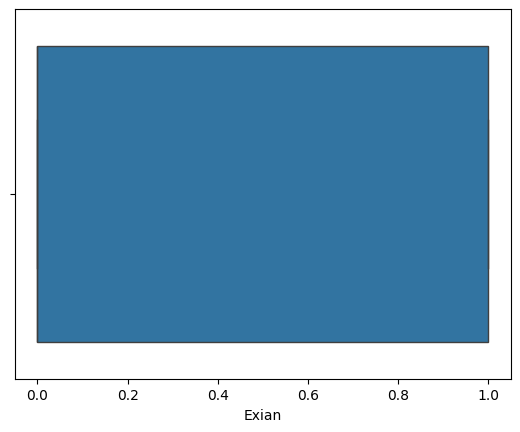

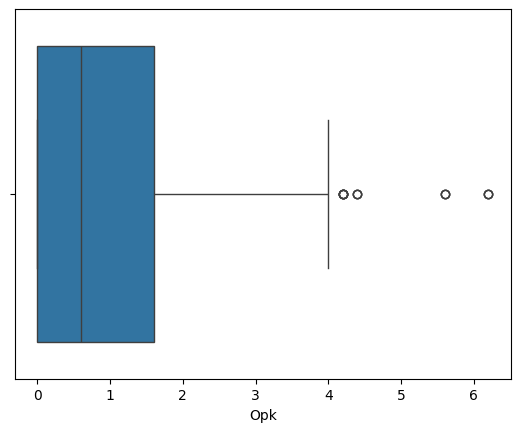

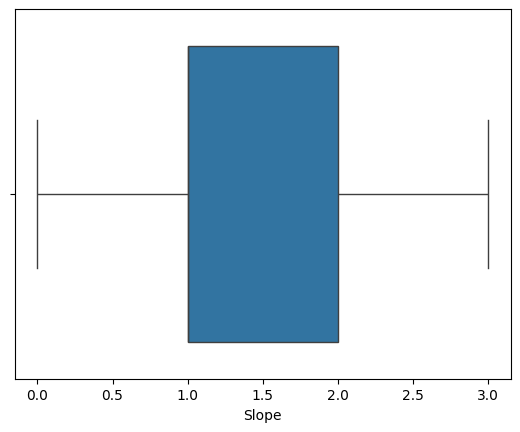

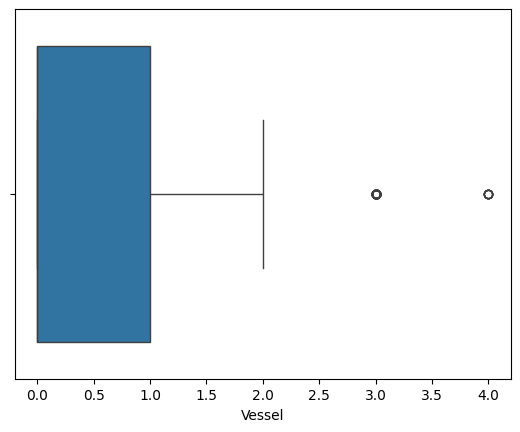

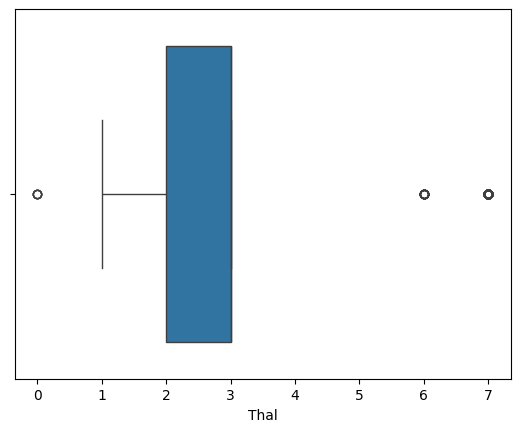

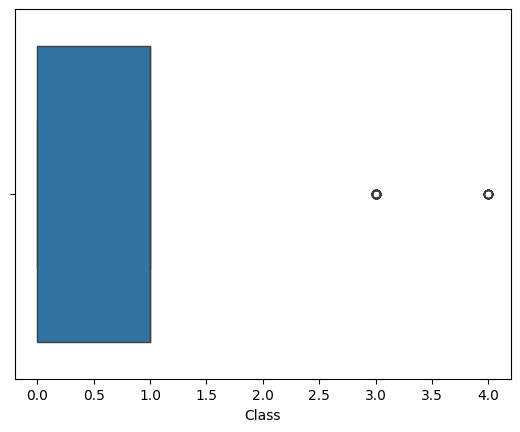

In [74]:
#Boxplot-to-identify outliers
import warnings
warnings.filterwarnings("ignore")
for i in df.select_dtypes(include="number").columns:
    sns.boxplot(data=df,x=i)
    plt.show()

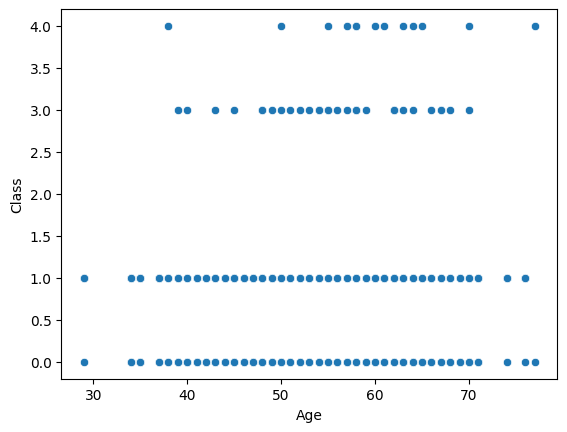

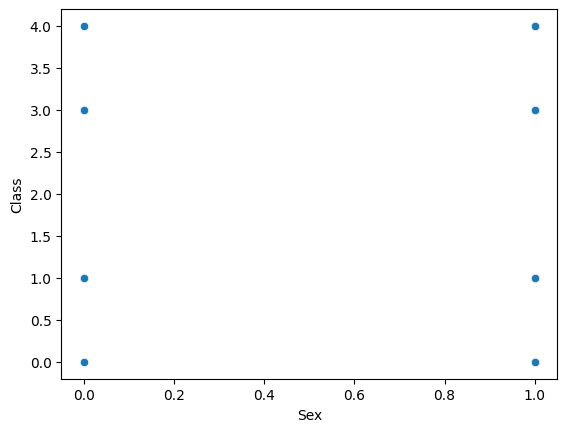

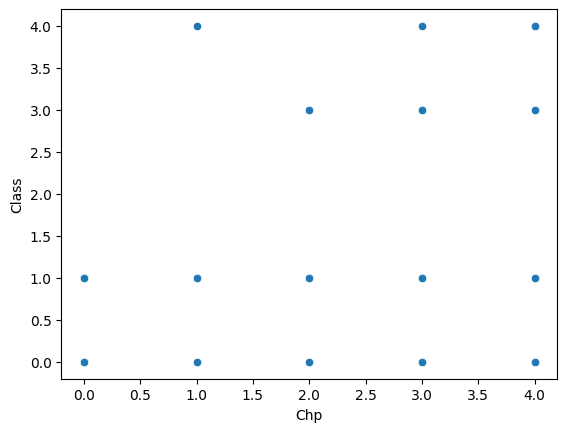

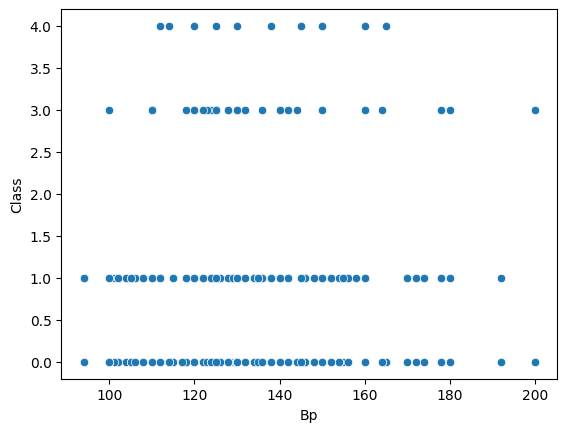

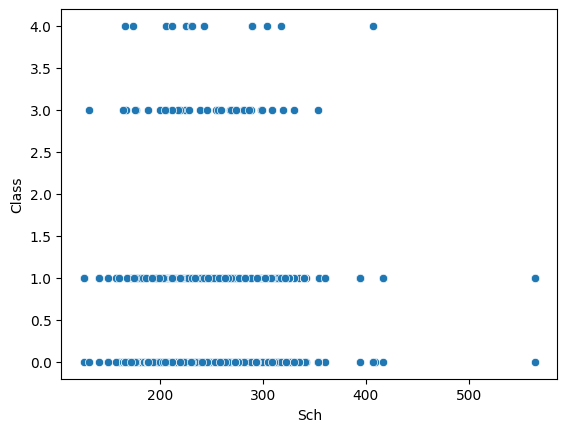

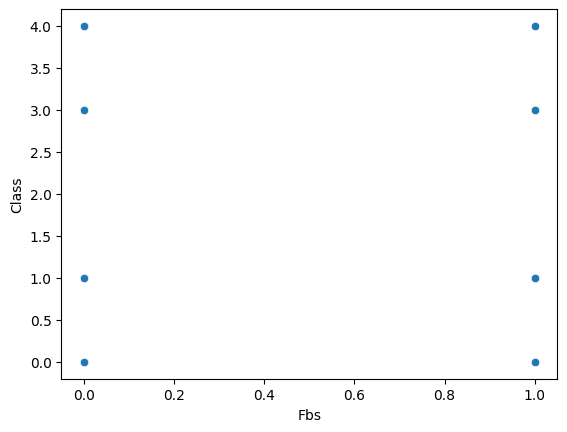

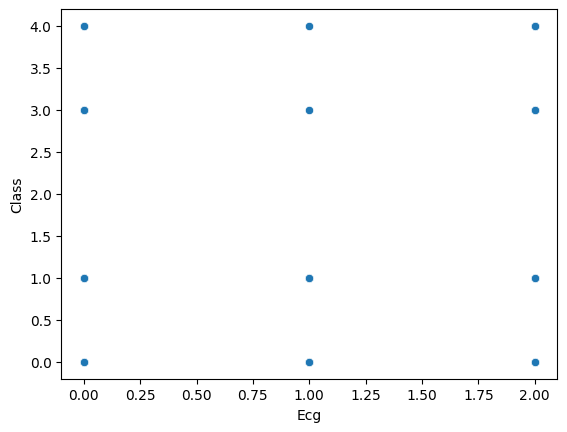

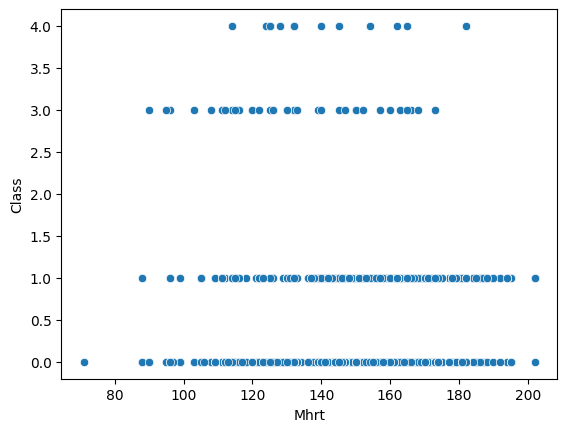

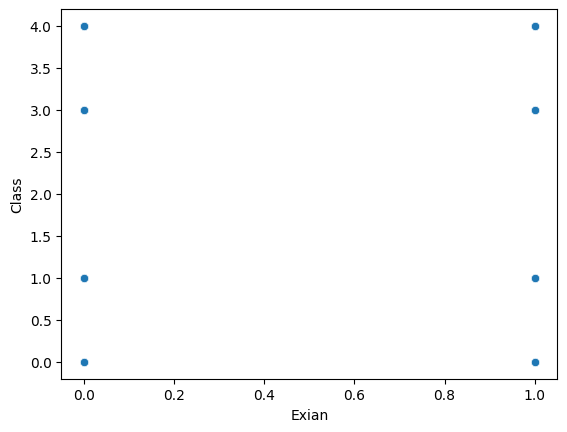

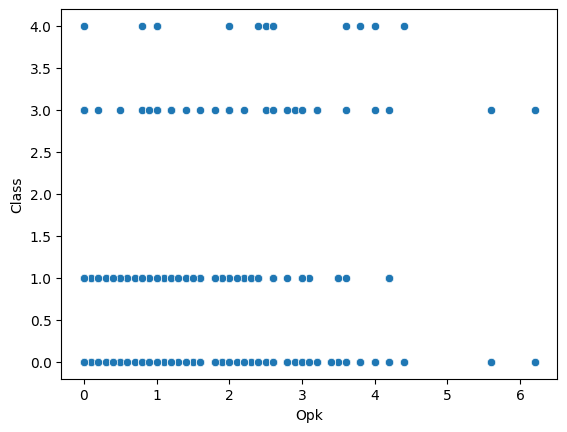

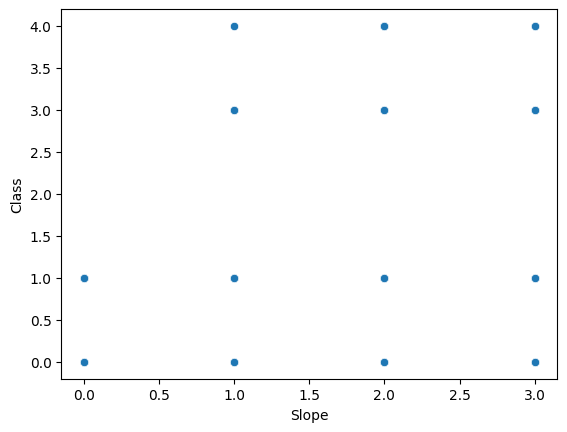

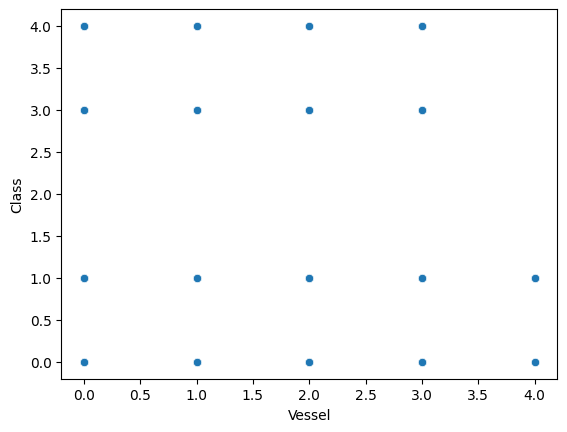

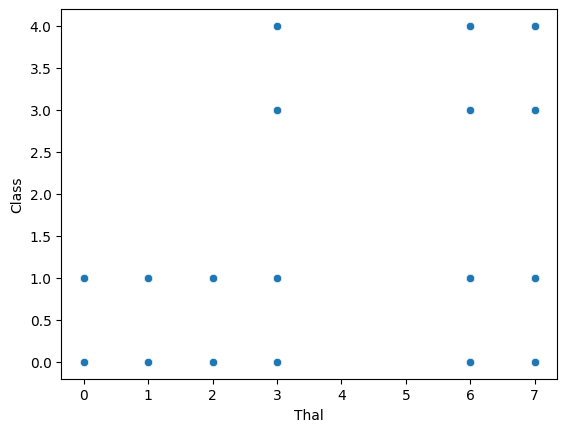

In [75]:
#Scatter plot to understand the relationship
for i in ['Age', 'Sex', 'Chp', 'Bp', 'Sch', 'Fbs', 'Ecg', 'Mhrt', 'Exian', 'Opk', 'Slope', 'Vessel', 'Thal']:
  sns.scatterplot(data=df,x=i,y='Class')
  plt.show()

In [76]:
df.select_dtypes(include="number").columns

Index(['Age', 'Sex', 'Chp', 'Bp', 'Sch', 'Fbs', 'Ecg', 'Mhrt', 'Exian', 'Opk',
       'Slope', 'Vessel', 'Thal', 'Class'],
      dtype='object')

In [77]:
#correlation with heatmap to interpret the relation and multicolliniarity
s=df.select_dtypes(include="number").corr()

<Axes: >

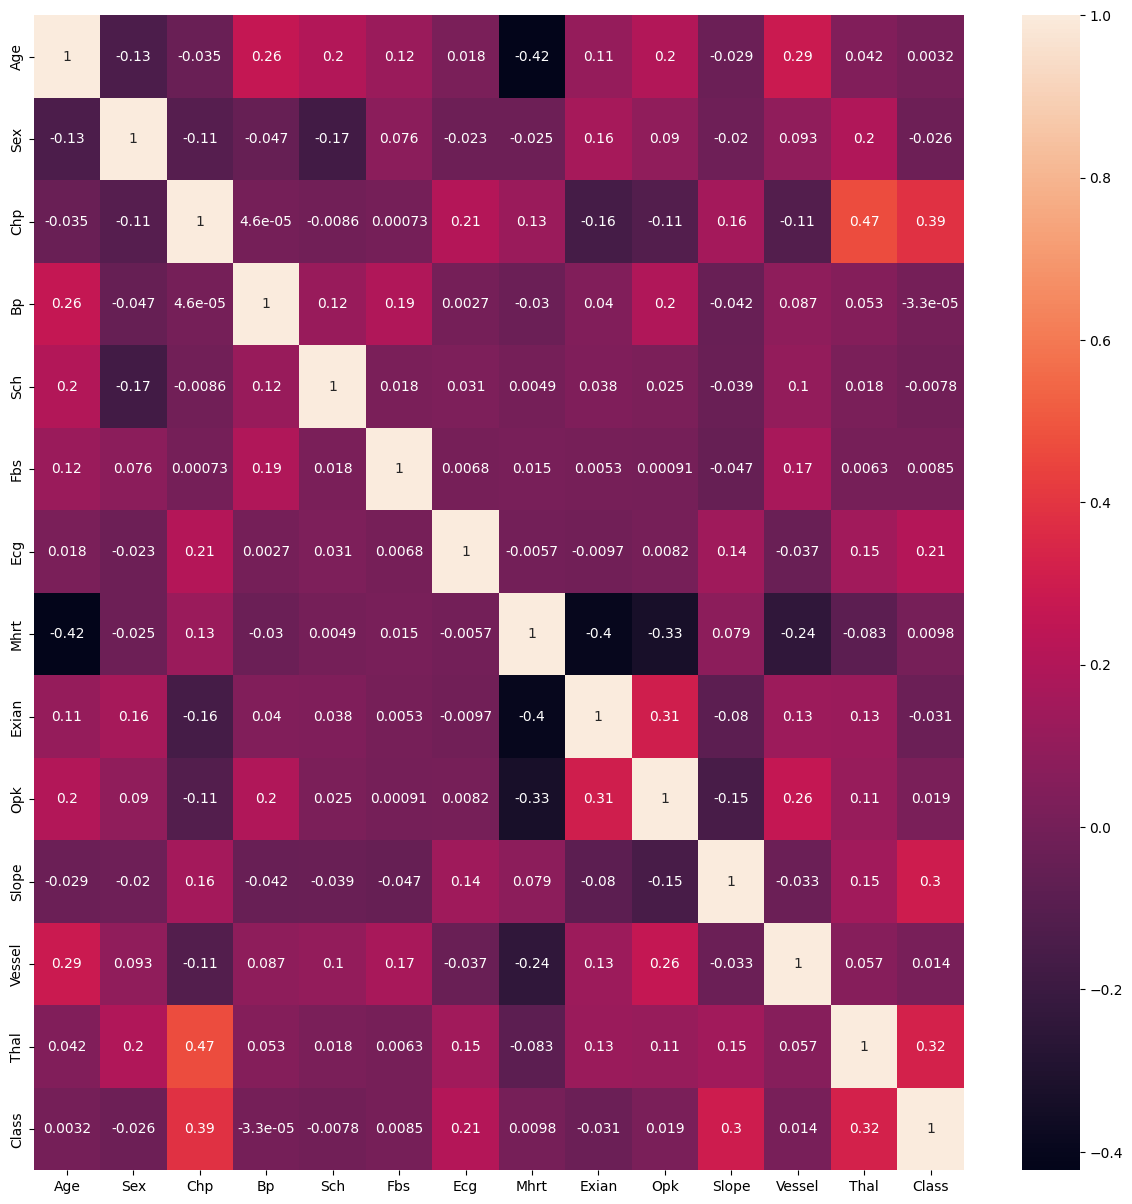

In [78]:
plt.figure(figsize=(15,15))
sns.heatmap(s,annot=True)

# **Step 5: Missing Value Treatment**

In [79]:
#Choose the method of imputing missing values
#like mean, median, mode or KNNIputer


In [80]:
for i in ["Age", "Bp", "Sch", "Mhrt", "Opk"]:
  df[i].fillna(df[i].median(),inplace=True)

In [81]:
from sklearn.impute import KNNImputer
impute=KNNImputer()

In [82]:
for i in df.select_dtypes(include="number").columns:
  df[i]=impute.fit_transform(df[[i]])

In [83]:
df.isnull().sum()

Age       0
Sex       0
Chp       0
Bp        0
Sch       0
Fbs       0
Ecg       0
Mhrt      0
Exian     0
Opk       0
Slope     0
Vessel    0
Thal      0
Class     0
dtype: int64

# **Step 6: Outlier Treatment**

In [84]:
def wisker(col):
  q1,q3=np.percentile(col,[25,75])
  iqr=q3-q1
  lw=q1-1.5*iqr
  uw=q3+1.5*iqr
  return lw, uw

In [85]:
wisker(df['Vessel'])

(-1.5, 2.5)

In [86]:
for i in ['Vessel','Thal', 'Class']:
  lw,uw=wisker(df[i])
  df[i]=np.where(df[i]<lw,lw,df[i])
  df[i]=np.where(df[i]>uw,uw,df[i])

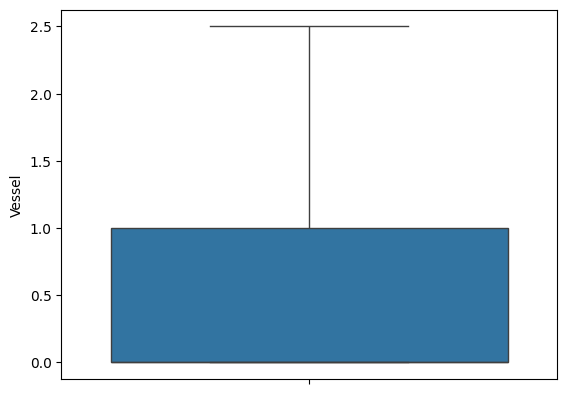

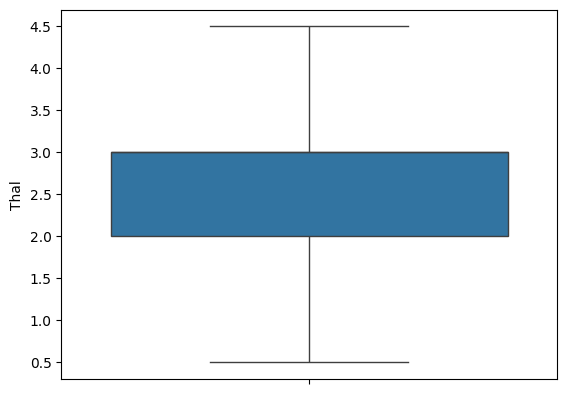

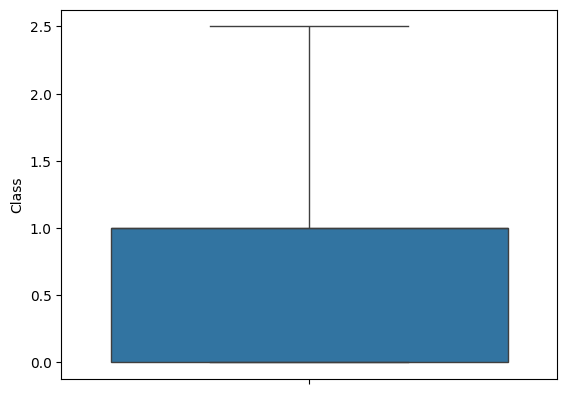

In [87]:
for i in ['Vessel', 'Thal', 'Class']:
  sns.boxplot(df[i])
  plt.show()

In [88]:
df.columns

Index(['Age', 'Sex', 'Chp', 'Bp', 'Sch', 'Fbs', 'Ecg', 'Mhrt', 'Exian', 'Opk',
       'Slope', 'Vessel', 'Thal', 'Class'],
      dtype='object')

# **Step 7: Encoding of Data**

In [89]:
#Label encoding and one hot encoding with pd.getdummies
dummy=pd.get_dummies(data=df,columns=["Sex", "Chp", "Fbs", "Ecg", "Exian", "Slope", "Thal"],drop_first=True)

In [90]:
dummy

,Age,Bp,Sch,Mhrt,Opk,Vessel,Class,Sex_0.6607883817427386,Sex_1.0,Chp_1.0,...,Exian_1.0,Slope_1.0,Slope_1.4279661016949152,Slope_2.0,Slope_3.0,Thal_1.0,Thal_2.0,Thal_3.0,Thal_3.127032520325203,Thal_4.5
0,63.0,145.0,233.0,150.0,2.3,0.0,0.0,0,1,1,...,0,0,0,0,1,0,0,0,0,1
2,67.0,120.0,229.0,129.0,2.6,2.0,1.0,0,1,0,...,1,0,0,1,0,0,0,0,0,1
3,37.0,130.0,250.0,187.0,3.5,0.0,0.0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
4,41.0,130.0,204.0,172.0,1.4,0.0,0.0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
5,56.0,120.0,236.0,178.0,0.8,0.0,0.0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1585,49.0,130.0,266.0,171.0,0.6,0.0,1.0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
1587,52.0,172.0,199.0,162.0,0.5,0.0,1.0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
1588,44.0,120.0,263.0,173.0,0.0,0.0,1.0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
1589,56.0,140.0,294.0,153.0,1.3,0.0,1.0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


# **Step 8: Start Building model**

In [91]:
#create x, y variables
x=df.drop('Class', axis=1)
y=df['Class']

In [92]:
df.columns

Index(['Age', 'Sex', 'Chp', 'Bp', 'Sch', 'Fbs', 'Ecg', 'Mhrt', 'Exian', 'Opk',
       'Slope', 'Vessel', 'Thal', 'Class'],
      dtype='object')

In [93]:
#Split the Data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [94]:
print (x_test)

       Age       Sex  Chp     Bp    Sch  Fbs  Ecg   Mhrt  Exian  Opk  Slope  \
236   42.0  1.000000  2.0  120.0  295.0  0.0  0.0  162.0    0.0  0.0    1.0   
370   59.0  1.000000  0.0  140.0  177.0  0.0  1.0  162.0    1.0  0.0    2.0   
581   58.0  1.000000  2.0  132.0  224.0  0.0  0.0  173.0    0.0  3.2    2.0   
346   60.0  1.000000  0.0  117.0  230.0  1.0  1.0  160.0    1.0  1.4    2.0   
98    54.0  1.000000  4.0  122.0  222.0  0.0  2.0  186.0    0.0  0.0    1.0   
...    ...       ...  ...    ...    ...  ...  ...    ...    ...  ...    ...   
953   57.0  0.000000  1.0  130.0  240.0  0.0  0.0  174.0    0.0  0.0    1.0   
342   42.0  1.000000  0.0  140.0  226.0  0.0  1.0  178.0    0.0  0.0    2.0   
1224  42.0  1.000000  2.0  120.0  240.0  1.0  1.0  194.0    0.0  0.8    0.0   
265   42.0  1.000000  3.0  130.0  180.0  0.0  0.0  150.0    0.0  0.0    1.0   
1066  71.0  0.660788  2.0  110.0  265.0  1.0  0.0  130.0    0.0  0.0    2.0   

      Vessel  Thal  
236      0.0   3.0  
370      

In [95]:
print (y_test)

236     0.0
370     0.0
581     0.0
346     0.0
98      0.0
       ... 
953     0.0
342     1.0
1224    1.0
265     0.0
1066    1.0
Name: Class, Length: 199, dtype: float64


In [96]:
#Using the Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

#setup random seed
np.random.seed(42)

#Create the data
x=df.drop('Class', axis=1)
y=df['Class']

#Split the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

#Instantaiate Random Forset Regressor
rf=RandomForestRegressor(n_estimators=100)
rf.fit(x_train,y_train)

#Evaluate the Random Forest Regressor
rf.score(x_test,y_test)

0.310863492343349

In [97]:
#Import the necessary modules
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import numpy as np

#Setup random seed
np.random.seed(42)

#Make the data
x=df.drop('Class', axis=1)
y=df['Class']

#Encode the target variable
le = LabelEncoder()
y = le.fit_transform(y)


#Split the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

#Instantiate Random Forest Classifier
clf=RandomForestClassifier(n_estimators=100)
clf.fit(x_train,y_train)

#Evaluate the Random Forest Classifier
clf.score(x_test,y_test)

0.6683417085427136

In [98]:
print(df)

       Age  Sex       Chp     Bp    Sch  Fbs      Ecg   Mhrt  Exian  Opk  \
0     63.0  1.0  1.000000  145.0  233.0  1.0  2.00000  150.0    0.0  2.3   
2     67.0  1.0  4.000000  120.0  229.0  0.0  2.00000  129.0    1.0  2.6   
3     37.0  1.0  3.000000  130.0  250.0  0.0  0.71066  187.0    0.0  3.5   
4     41.0  0.0  2.000000  130.0  204.0  0.0  2.00000  172.0    0.0  1.4   
5     56.0  1.0  2.000000  120.0  236.0  0.0  0.00000  178.0    0.0  0.8   
...    ...  ...       ...    ...    ...  ...      ...    ...    ...  ...   
1585  49.0  1.0  2.000000  130.0  266.0  0.0  0.00000  171.0    0.0  0.6   
1587  52.0  1.0  3.000000  172.0  199.0  1.0  0.00000  162.0    0.0  0.5   
1588  44.0  1.0  2.000000  120.0  263.0  0.0  0.00000  173.0    0.0  0.0   
1589  56.0  0.0  1.841307  140.0  294.0  0.0  2.00000  153.0    0.0  1.3   
1590  57.0  1.0  4.000000  140.0  192.0  0.0  0.00000  148.0    0.0  0.4   

      Slope  Vessel  Thal  Class  
0       3.0     0.0   4.5    0.0  
2       2.0     2

## **Step 9: Fitting The Model To Data**
Different names for:
* x = features, features variables, data
* y = labels, targets, target variables**

In [99]:
#fit the model/algorithm on our data and use it to make predictions
#fitting the model to the data

#Import the necessary modules
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import numpy as np

#Setup random seed
np.random.seed(42)

#Make the data
x=df.drop('Class', axis=1)
y=df['Class']

#Encode the target variable
le = LabelEncoder()
y = le.fit_transform(y)


#Split the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

#Instantiate Random Forest Classifier
clf=RandomForestClassifier(n_estimators=100)

#Fit the model to the data
clf.fit(x_train,y_train)

#Evaluate the Random Forest Classifier
clf.score(x_test,y_test)

0.6683417085427136

In [100]:
x.head()

,Age,Sex,Chp,Bp,Sch,Fbs,Ecg,Mhrt,Exian,Opk,Slope,Vessel,Thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.00000,150.0,0.0,2.3,3.0,0.0,4.5
2,67.0,1.0,4.0,120.0,229.0,0.0,2.00000,129.0,1.0,2.6,2.0,2.0,4.5
3,37.0,1.0,3.0,130.0,250.0,0.0,0.71066,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.00000,172.0,0.0,1.4,1.0,0.0,3.0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.00000,178.0,0.0,0.8,1.0,0.0,3.0


In [101]:
clf.score(x_train,y_train)

0.9368686868686869

In [102]:
clf.score(x_test,y_test)

0.6683417085427136

In [103]:
from sklearn.ensemble import RandomForestClassifier

clf= RandomForestClassifier(n_estimators=100)

In [104]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [105]:
#Tuning Hyperparameter by hand
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

**Let's adjust the following:

* 'max_depth'
* 'max_features'
* 'min_samples_leaf'
* 'min_samples_split'
* 'n_estimators'**

In [106]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

accuracy = accuracy_score(y_test, y_pred) * 100
print("Accuracy:", accuracy, "%")

Accuracy: 63.31658291457286 %
